# [手把手教你完成一个数据科学小项目（8）：Emoji提取与分布图谱]()
请先阅读[“中国年轻人正带领国家走向危机”，这锅背是不背？](https://zhuanlan.zhihu.com/p/41880873)  一文，以对“手把手教你完成一个数据科学小项目”系列有个全局性的了解。

截至目前我们已经完成了[数据爬取](https://zhuanlan.zhihu.com/p/42060094)、[数据提取与IP查询](https://zhuanlan.zhihu.com/p/42151036)、[数据异常与清洗](https://zhuanlan.zhihu.com/p/42244913)、[评论数变化情况分析](https://zhuanlan.zhihu.com/p/42333272)、[省份提取与可视化](https://zhuanlan.zhihu.com/p/42406348)、[城市提取与可视化](https://zhuanlan.zhihu.com/p/42532934)、[经纬度获取与BDP可视化](https://zhuanlan.zhihu.com/p/42959539)。本文将对评论里的 emoji 进行提取，并绘制分布图谱。
![](https://upload-images.jianshu.io/upload_images/7145358-4e7614d81d4e2ca6.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)



## 读取数据
本次主要关注评论`content`列，所以仅读取下面几列数据，忽略其他列。

In [71]:
import pandas as pd
df = pd.read_csv('Sina_Finance_Comments_All_20180811_Cleaned.csv',encoding='utf-8',usecols=['nick','time','content'])
df.head()

,nick,time,content
0,我阿訇打钱,2018-08-11 17:15:13,[费解][费解][费解]
1,TKK_Questioning,2018-08-11 17:04:20,那你以为不单身就能避免？
2,碌碌无为的困难群众,2018-08-11 16:29:58,谢谢
3,竖纹AdaIX,2018-08-11 14:25:19,想去声援你 结果发不出🌚
4,猫切,2018-08-11 13:02:03,锅太大，接不住


## 提取 emoji

In [72]:
import re
def get_emoji(content):
    pattern =re.compile(u"\[[a-zA-Z\u4e00-\u9fa5]+\]")
    result=re.findall(pattern,content)
    return result
df['emojis_list'] = df['content'].apply(get_emoji)
df.head()

,nick,time,content,emojis_list
0,我阿訇打钱,2018-08-11 17:15:13,[费解][费解][费解],"[[费解], [费解], [费解]]"
1,TKK_Questioning,2018-08-11 17:04:20,那你以为不单身就能避免？,[]
2,碌碌无为的困难群众,2018-08-11 16:29:58,谢谢,[]
3,竖纹AdaIX,2018-08-11 14:25:19,想去声援你 结果发不出🌚,[]
4,猫切,2018-08-11 13:02:03,锅太大，接不住,[]


将提取后的列的全部元素转换成列表。

In [73]:
emojis = df['emojis_list'].values.tolist()
emojis

[['[费解]', '[费解]', '[费解]'],
 [],
 [],
 [],
 [],
 ['[允悲]', '[允悲]'],
 ['[嘿哈]'],
 [],
 [],
 [],
 [],
 ['[笑而不语]'],
 [],
 [],
 ['[doge]'],
 [],
 [],
 ['[doge]'],
 ['[泪]'],
 ['[doge]'],
 ['[吃瓜]'],
 ['[允悲]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[二哈]'],
 [],
 [],
 [],
 [],
 ['[笑而不语]', '[笑而不语]'],
 [],
 ['[小黄人得意]'],
 [],
 [],
 ['[喵喵]', '[喵喵]'],
 ['[二哈]'],
 [],
 [],
 ['[doge]', '[doge]', '[doge]'],
 [],
 [],
 [],
 [],
 ['[允悲]'],
 [],
 ['[思考]', '[思考]', '[思考]'],
 [],
 [],
 ['[允悲]'],
 ['[挖鼻]'],
 ['[doge]'],
 [],
 [],
 [],
 [],
 ['[并不简单]'],
 [],
 ['[泪]', '[泪]'],
 [],
 [],
 ['[摊手]', '[摊手]'],
 [],
 [],
 [],
 [],
 [],
 ['[费解]'],
 ['[doge]'],
 [],
 [],
 [],
 [],
 ['[吃瓜]'],
 [],
 [],
 [],
 ['[拜拜]'],
 [],
 [],
 [],
 [],
 [],
 ['[拜拜]'],
 [],
 [],
 [],
 [],
 [],
 ['[嘻嘻]', '[嘻嘻]', '[嘻嘻]'],
 [],
 ['[偷笑]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[允悲]'],
 ['[爱你]'],
 ['[允悲]', '[允悲]', '[允悲]'],
 [],
 [],
 [],
 ['[doge]'],
 [],
 [],
 [],
 [],
 [],
 ['[白眼]'],
 [],
 [],
 [],
 ['[吃瓜]', '[吃瓜]'],

合并嵌套列表为单一列表，之前文章和代码里已经用过很多次喽。并统计出emoji共76种。

In [74]:
emojis_list = sum(emojis, [])
emojis_set = list(set(emojis_list))
num = len(emojis_set)
print(num)
print(emojis_set)

76
['[打脸]', '[白眼]', '[太开心]', '[允悲]', '[爱你]', '[ok]', '[小黄人坏笑]', '[思考]', '[喵喵]', '[偷笑]', '[悲伤]', '[抱抱]', '[睡]', '[围观]', '[摊手]', '[怒]', '[衰]', '[中国赞]', '[汗]', '[鲜花]', '[小黄人得意]', '[闭嘴]', '[吃惊]', '[吐]', '[阴险]', '[晕]', '[骷髅]', '[憧憬]', '[呵呵]', '[米奇比心]', '[羞嗒嗒]', '[可怜]', '[可爱]', '[挖鼻]', '[哈哈]', '[微笑]', '[挤眼]', '[耶]', '[给力]', '[笑cry]', '[威武]', '[握手]', '[吃瓜]', '[鼓掌]', '[拜拜]', '[失望]', '[坏笑]', '[泪]', '[跪了]', '[嘿哈]', '[费解]', '[哆啦A梦汗]', '[嘻嘻]', '[亲亲]', '[皱眉]', '[哈欠]', '[怒骂]', '[攤手]', '[米奇大哭]', '[笑而不语]', '[黑线]', '[鄙视]', '[good]', '[doge]', '[作揖]', '[費解]', '[猪头]', '[二哈]', '[赞]', '[哼]', '[嘘]', '[生病]', '[哆啦A梦微笑]', '[疑问]', '[污]', '[并不简单]']


## emoji 分组统计

In [75]:
from collections import Counter
counter = Counter(emojis_list)
print(counter.most_common())

[('[doge]', 198), ('[二哈]', 148), ('[允悲]', 131), ('[费解]', 100), ('[摊手]', 93), ('[微笑]', 83), ('[笑cry]', 70), ('[吃瓜]', 66), ('[嘻嘻]', 44), ('[吐]', 35), ('[笑而不语]', 34), ('[并不简单]', 33), ('[跪了]', 32), ('[挖鼻]', 25), ('[拜拜]', 24), ('[喵喵]', 20), ('[太开心]', 20), ('[哈哈]', 16), ('[作揖]', 15), ('[泪]', 14), ('[good]', 13), ('[偷笑]', 10), ('[汗]', 10), ('[哆啦A梦汗]', 9), ('[失望]', 9), ('[疑问]', 9), ('[思考]', 8), ('[爱你]', 6), ('[赞]', 6), ('[憧憬]', 6), ('[污]', 6), ('[阴险]', 6), ('[白眼]', 5), ('[黑线]', 5), ('[中国赞]', 5), ('[可爱]', 5), ('[威武]', 5), ('[怒]', 4), ('[鄙视]', 4), ('[米奇大哭]', 4), ('[ok]', 4), ('[皱眉]', 4), ('[費解]', 4), ('[吃惊]', 4), ('[怒骂]', 4), ('[哼]', 4), ('[鲜花]', 4), ('[坏笑]', 3), ('[悲伤]', 3), ('[鼓掌]', 3), ('[攤手]', 3), ('[嘘]', 3), ('[晕]', 3), ('[衰]', 2), ('[呵呵]', 2), ('[抱抱]', 2), ('[小黄人坏笑]', 2), ('[可怜]', 2), ('[哈欠]', 2), ('[打脸]', 2), ('[嘿哈]', 1), ('[小黄人得意]', 1), ('[握手]', 1), ('[挤眼]', 1), ('[耶]', 1), ('[亲亲]', 1), ('[米奇比心]', 1), ('[羞嗒嗒]', 1), ('[围观]', 1), ('[猪头]', 1), ('[闭嘴]', 1), ('[生病]', 1), ('[给力]', 1), ('[哆啦A梦微

In [76]:
y_emojis, x_counts = zip(*counter.most_common())

## emoji 使用情况

In [77]:
from pyecharts import Bar
bar = Bar("emoji 使用情况")
bar.add("emoji", y_emojis, x_counts, is_stack=True,is_label_show=True,xaxis_interval=0,xaxis_rotate=-90,xaxis_margin=8)
bar

In [78]:
from pyecharts import Bar
bar = Bar("emoji 使用情况")
bar.add("emoji", y_emojis[:20], x_counts[:20], is_stack=True,is_label_show=True,xaxis_interval=0,xaxis_rotate=-45,xaxis_margin=8)
bar

这回的 emoji 没找到对应表情图，所以无法像[当你点开这首《八月》的歌：9400余条评论的分析与挖掘](https://zhuanlan.zhihu.com/p/41516392)里显示，不过从上一个项目了解如何实现也是一样的：
![](https://upload-images.jianshu.io/upload_images/7145358-1a9f6006bfa282d6.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 评论数据
拿出评论数据，方便之后绘制emoji分布图谱

In [79]:
cmnts_list = df['content'].values.tolist()
cmnts_list

['[费解][费解][费解]',
 '那你以为不单身就能避免？',
 '谢谢',
 '想去声援你 结果发不出🌚',
 '锅太大，接不住',
 '[允悲][允悲]…',
 '居然这么说我们年轻人[嘿哈]',
 '老了',
 '我觉得这条博就是一个笑话……',
 '到底该不该透支消费？专家统一一下意见，在线等，急。',
 '拜托，我买再多手机穿再多名牌喝再多星巴克都没一个房贷债务高吧。推责任推这么心安理得恶不恶心啊。',
 '你们反省一下，不要做历史的罪人[笑而不语]',
 '茶水费还是买房嘛(ಡωಡ)',
 '放你🐴屁',
 'Reply @dddyqqq_:我就借借花呗和白条，他是透支信用卡[doge]',
 '没那么多的，老铁，办个会员卡还买一送一呢',
 '你是90后吧？',
 '[doge]你这样很危险啊',
 '买不起房结不起婚生不起孩子[泪]还有一个郭姓胖子天天想从我兜里面骗钱',
 '[doge]可能是70后写出来的',
 '[吃瓜]我发现这群人真有意思什么锅都能往年轻人头上扣 80.90.00后都被扣了个遍',
 '前几天还有个标题，“老年人正在带领国家走向危机”。[允悲]',
 '你以为单身就能避免财务危机？？？',
 '10年前贷款买房的人都赚翻了，把钱存银行的，都傻眼了对吧？提前消费，贷款消费，对拉动内需意义重大，如果大家只存钱不贷款银行就憋死了。',
 '你还是25岁的',
 '评论亮了',
 '我家人告诉我不能去借，就算自己过得苦些',
 '畸形的是你',
 '看评论@_Transitory',
 '请先酝酿一下下',
 '这个年轻人已经指向00后了 像我们这种80后90后 已经不属于这个区间了[二哈]',
 '值得反思',
 '谁说一定要成家了',
 '70%的千禧一代都是有房的',
 '780连坐出',
 '那我等xs[笑而不语][笑而不语]',
 '等等，xs出呀',
 '国家不是一直都是在X的带领下前进吗[小黄人得意]',
 '我都是买了带走…',
 '爱情这东西太奢侈了，感觉是可遇不可求的东西。我觉得自己不会有这么好的运气',
 '形象，我就喜欢在星巴克自拍，[喵喵][喵喵]',
 '典型的吃完饭骂厨子[二哈]',
 '专家，就是叫你搬起砖头砸自己的家',
 '反正都是年轻人的锅',
 '[doge][doge][doge]那我应该

将列表合并成一个字符串

In [80]:
cmnts = ' '.join(cmnts_list)
print(len(cmnts))
print(cmnts)

83252
[费解][费解][费解] 那你以为不单身就能避免？ 谢谢 想去声援你 结果发不出🌚 锅太大，接不住 [允悲][允悲]… 居然这么说我们年轻人[嘿哈] 老了 我觉得这条博就是一个笑话…… 到底该不该透支消费？专家统一一下意见，在线等，急。 拜托，我买再多手机穿再多名牌喝再多星巴克都没一个房贷债务高吧。推责任推这么心安理得恶不恶心啊。 你们反省一下，不要做历史的罪人[笑而不语] 茶水费还是买房嘛(ಡωಡ) 放你🐴屁 Reply @dddyqqq_:我就借借花呗和白条，他是透支信用卡[doge] 没那么多的，老铁，办个会员卡还买一送一呢 你是90后吧？ [doge]你这样很危险啊 买不起房结不起婚生不起孩子[泪]还有一个郭姓胖子天天想从我兜里面骗钱 [doge]可能是70后写出来的 [吃瓜]我发现这群人真有意思什么锅都能往年轻人头上扣 80.90.00后都被扣了个遍 前几天还有个标题，“老年人正在带领国家走向危机”。[允悲] 你以为单身就能避免财务危机？？？ 10年前贷款买房的人都赚翻了，把钱存银行的，都傻眼了对吧？提前消费，贷款消费，对拉动内需意义重大，如果大家只存钱不贷款银行就憋死了。 你还是25岁的 评论亮了 我家人告诉我不能去借，就算自己过得苦些 畸形的是你 看评论@_Transitory 请先酝酿一下下 这个年轻人已经指向00后了 像我们这种80后90后 已经不属于这个区间了[二哈] 值得反思 谁说一定要成家了 70%的千禧一代都是有房的 780连坐出 那我等xs[笑而不语][笑而不语] 等等，xs出呀 国家不是一直都是在X的带领下前进吗[小黄人得意] 我都是买了带走… 爱情这东西太奢侈了，感觉是可遇不可求的东西。我觉得自己不会有这么好的运气 形象，我就喜欢在星巴克自拍，[喵喵][喵喵] 典型的吃完饭骂厨子[二哈] 专家，就是叫你搬起砖头砸自己的家 反正都是年轻人的锅 [doge][doge][doge]那我应该换个iphoneX 敢吗，以前计划生育也没人敢危害社会 呵，买房，现在的房价哪是你让攒就买的起的，买不起还不让买其他东西吗 这什么神奇逻辑 关键是千禧一代连个人大代表都当不上怎么能担负带路人的重任？ 房价那么高。不贷款。谁能全款。专家真多是站着说话不腰疼 他们的形象代表是社交网络中的星巴克咖啡馆自拍。[允悲] 没错了说的就是你 是是是是  怪

## jieba 分词
在[GitHub/jieba](https://github.com/fxsjy/jieba)分词前，先把上面的`emojis_set`里的去掉中括号后的`emoji`一个个都添加进自定义的词典，以免分词时被切分开。

此处需注意，如果不去掉中括号`[ ]`，直接将整个`emojis`添加进词典的话，后续分词时，括号还是会被分开，可能相应的需要修改jieba源码才行（[jieba分词与词性标注自定义词典支持特殊字符](https://blog.csdn.net/weixin_42471956/article/details/80795534)），但尝试后无果，于是还是采取现在的方案。

[jieba/test/test_userdict.py](https://github.com/fxsjy/jieba/blob/master/test/test_userdict.py)  
`jieba.del_word('自定义词')`或者在`txt`的存好，然后读入`jieba.load_userdict("userdict.txt")`

In [81]:
import jieba
emoji_drop = []
for emojis in y_emojis:
    emoji = emojis[1:-1] # 去掉括号
    jieba.add_word(emoji) # 读者可将上一行注释掉，看看分词结果
    emoji_drop.append(emoji) # 将去掉括号后的emoji单独保存
words = list(jieba.cut(cmnts))
print(len(words))
print(words)

54431
['[', '费解', ']', '[', '费解', ']', '[', '费解', ']', ' ', '那', '你', '以为', '不', '单身', '就', '能', '避免', '？', ' ', '谢谢', ' ', '想', '去', '声援', '你', ' ', '结果', '发不出', '🌚', ' ', '锅太大', '，', '接', '不住', ' ', '[', '允悲', ']', '[', '允悲', ']', '…', ' ', '居然', '这么', '说', '我们', '年轻人', '[', '嘿哈', ']', ' ', '老', '了', ' ', '我', '觉得', '这条博', '就是', '一个', '笑话', '…', '…', ' ', '到底', '该不该', '透支', '消费', '？', '专家', '统一', '一下', '意见', '，', '在线', '等', '，', '急', '。', ' ', '拜托', '，', '我', '买', '再', '多', '手机', '穿', '再', '多', '名牌', '喝', '再', '多', '星巴克', '都', '没', '一个', '房贷', '债务', '高', '吧', '。', '推', '责任', '推', '这么', '心安理得', '恶', '不', '恶心', '啊', '。', ' ', '你们', '反省', '一下', '，', '不要', '做', '历史', '的', '罪人', '[', '笑而不语', ']', ' ', '茶水', '费', '还是', '买房', '嘛', '(', 'ಡ', 'ω', 'ಡ', ')', ' ', '放', '你', '🐴', '屁', ' ', 'Reply', ' ', '@', 'dddyqqq', '_', ':', '我', '就', '借借', '花', '呗', '和', '白条', '，', '他', '是', '透支', '信用卡', '[', 'doge', ']', ' ', '没', '那么', '多', '的', '，', '老铁', '，', '办个', '会员卡', '还', '买一送一', '呢', ' ', '你', '是'

In [82]:
print(y_emojis)

('[doge]', '[二哈]', '[允悲]', '[费解]', '[摊手]', '[微笑]', '[笑cry]', '[吃瓜]', '[嘻嘻]', '[吐]', '[笑而不语]', '[并不简单]', '[跪了]', '[挖鼻]', '[拜拜]', '[喵喵]', '[太开心]', '[哈哈]', '[作揖]', '[泪]', '[good]', '[偷笑]', '[汗]', '[哆啦A梦汗]', '[失望]', '[疑问]', '[思考]', '[爱你]', '[赞]', '[憧憬]', '[污]', '[阴险]', '[白眼]', '[黑线]', '[中国赞]', '[可爱]', '[威武]', '[怒]', '[鄙视]', '[米奇大哭]', '[ok]', '[皱眉]', '[費解]', '[吃惊]', '[怒骂]', '[哼]', '[鲜花]', '[坏笑]', '[悲伤]', '[鼓掌]', '[攤手]', '[嘘]', '[晕]', '[衰]', '[呵呵]', '[抱抱]', '[小黄人坏笑]', '[可怜]', '[哈欠]', '[打脸]', '[嘿哈]', '[小黄人得意]', '[握手]', '[挤眼]', '[耶]', '[亲亲]', '[米奇比心]', '[羞嗒嗒]', '[围观]', '[猪头]', '[闭嘴]', '[生病]', '[给力]', '[哆啦A梦微笑]', '[骷髅]', '[睡]')


去掉括号后的结果

In [83]:
print(emoji_drop)

['doge', '二哈', '允悲', '费解', '摊手', '微笑', '笑cry', '吃瓜', '嘻嘻', '吐', '笑而不语', '并不简单', '跪了', '挖鼻', '拜拜', '喵喵', '太开心', '哈哈', '作揖', '泪', 'good', '偷笑', '汗', '哆啦A梦汗', '失望', '疑问', '思考', '爱你', '赞', '憧憬', '污', '阴险', '白眼', '黑线', '中国赞', '可爱', '威武', '怒', '鄙视', '米奇大哭', 'ok', '皱眉', '費解', '吃惊', '怒骂', '哼', '鲜花', '坏笑', '悲伤', '鼓掌', '攤手', '嘘', '晕', '衰', '呵呵', '抱抱', '小黄人坏笑', '可怜', '哈欠', '打脸', '嘿哈', '小黄人得意', '握手', '挤眼', '耶', '亲亲', '米奇比心', '羞嗒嗒', '围观', '猪头', '闭嘴', '生病', '给力', '哆啦A梦微笑', '骷髅', '睡']


## NLTK 分布图谱
分布图谱在[当你点开这首《八月》的歌：9400余条评论的分析与挖掘](https://zhuanlan.zhihu.com/p/41516392)项目时，就想实现，可惜一直没成功，notebook里保留了尝试的代码，且整个代码太杂乱，需如本系列一样后续拆分开和润色。

也是因缘际会，想本系列项目结束后，下一个系列就来玩玩热门电视剧、热门电影，也罗列了许多切入点，感觉要是能搞出来，还是不错的。这回也先绘制了于正的热门清宫剧《延禧攻略》里的一些主要人物在小说文本中的分布图谱。
![](https://upload-images.jianshu.io/upload_images/7145358-aafb8118102d6874.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

扯远了，因为上述尝试成功后，这回也用到emoji的分布上来。虽然评论数据是拼接到一起，因而分布图谱的可解释性一般，权当尝个鲜、玩玩新花样。

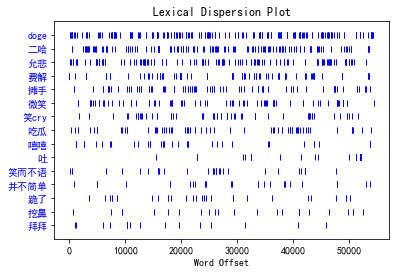

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.draw.dispersion import dispersion_plot

plt.rcParams['font.sans-serif'] = ['SimHei']
ntext = nltk.Text(words)
ntext.dispersion_plot(emoji_drop[:15])

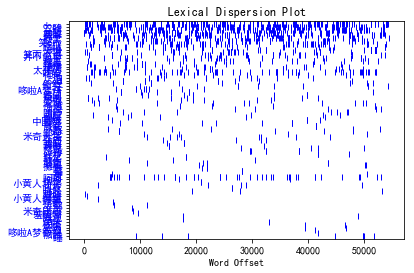

In [85]:
ntext.dispersion_plot(emoji_drop)